# All Imports

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Data Loading And Visualization

In [ ]:
data = pd.read_csv('/content/sample_data/lending_club_loan_two.csv')

In [ ]:
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

<Axes: xlabel='installment', ylabel='loan_amnt'>

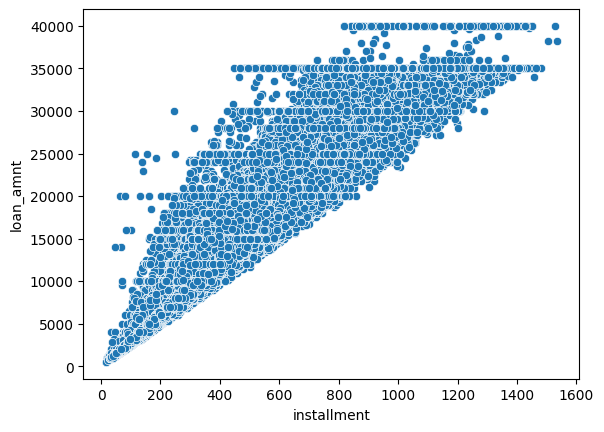

In [ ]:
sns.scatterplot(x='installment',y='loan_amnt',data=data)

<Axes: xlabel='loan_status', ylabel='count'>

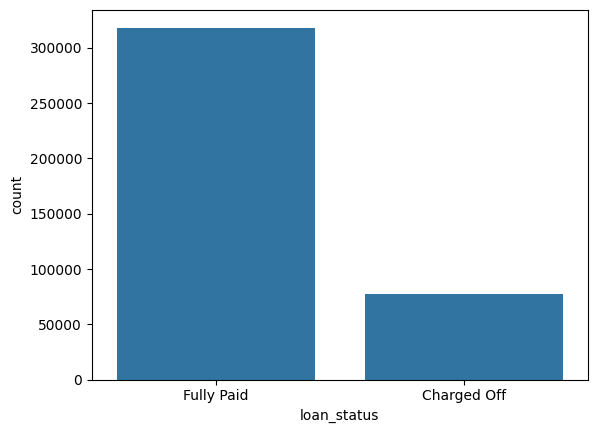

In [ ]:
sns.countplot(x='loan_status',data=data)

(0.0, 45000.0)

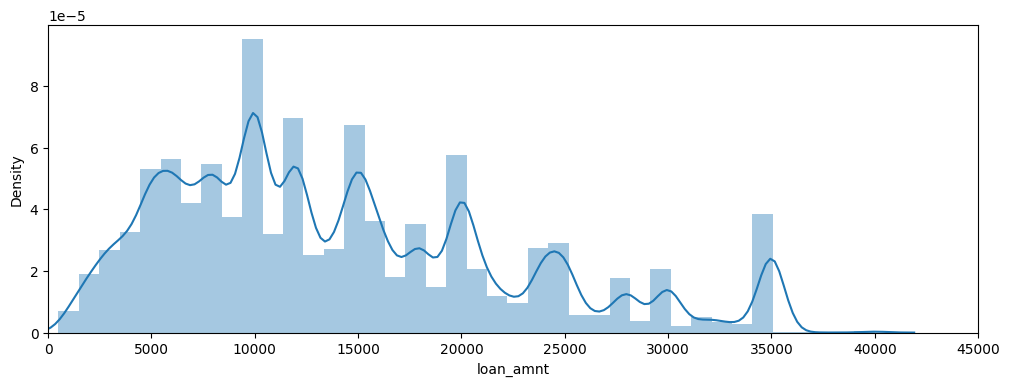

In [ ]:
plt.figure(figsize=(12,4))
sns.distplot(data['loan_amnt'],kde=True,bins=40)
plt.xlim(0,45000)

<Axes: xlabel='sub_grade', ylabel='count'>

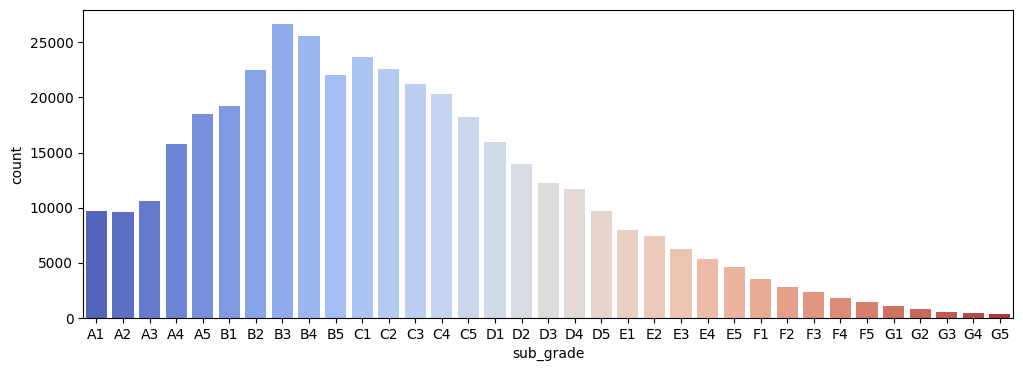

In [ ]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(data['sub_grade'].unique())
sns.countplot(x='sub_grade',data=data,order = subgrade_order,palette='coolwarm' )

<Axes: xlabel='sub_grade', ylabel='count'>

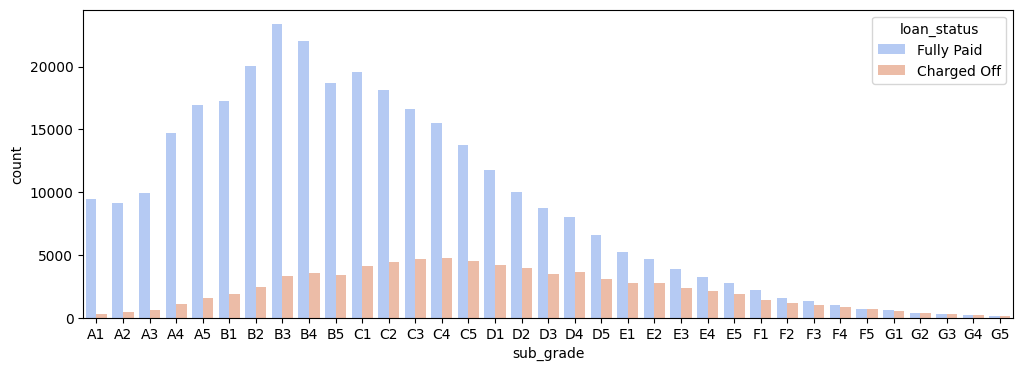

In [ ]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(data['sub_grade'].unique())
sns.countplot(x='sub_grade',data=data,order = subgrade_order,palette='coolwarm' ,hue='loan_status')

In [ ]:
emp_length_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']

<Axes: xlabel='emp_length', ylabel='count'>

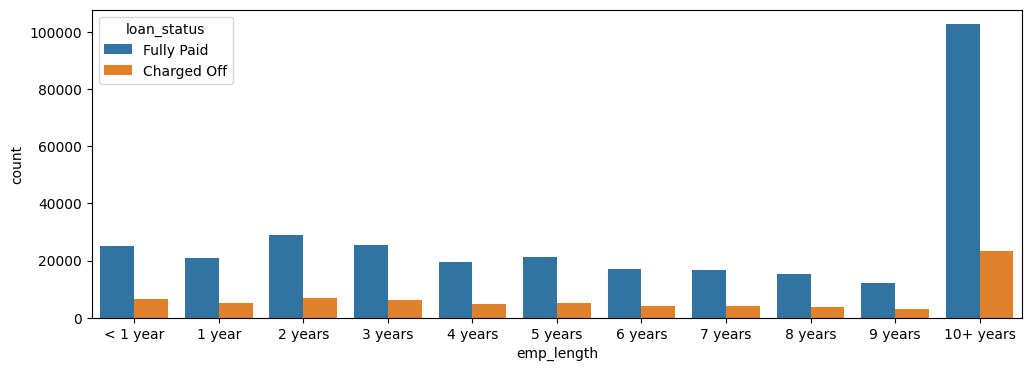

In [ ]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=data,order=emp_length_order,hue='loan_status')

In [ ]:
data.select_dtypes(include=['float64']).corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


(10.0, 0.0)

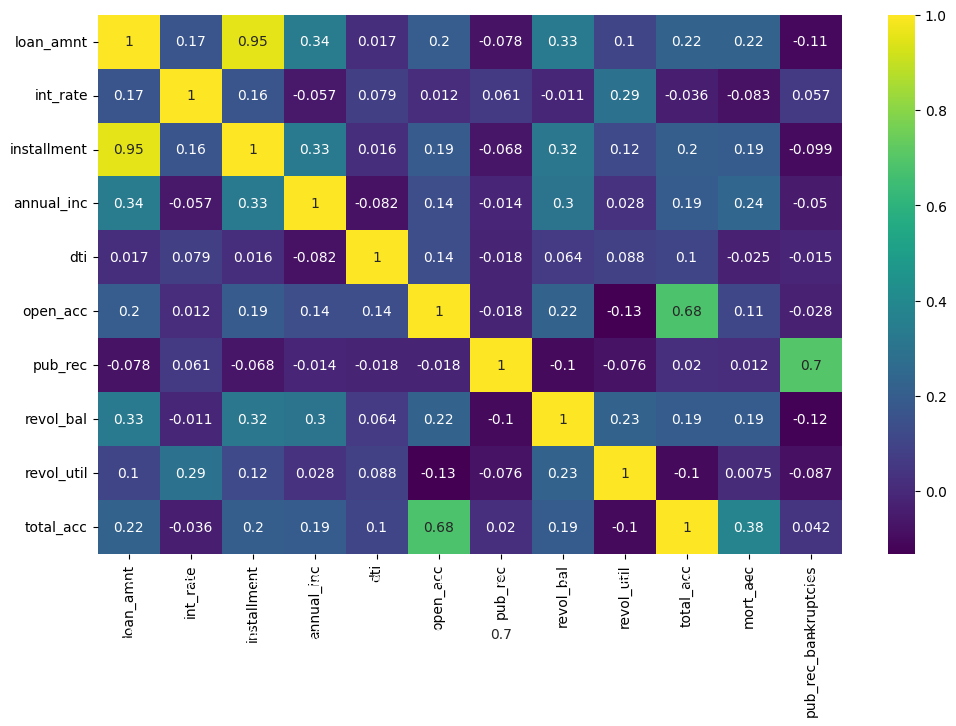

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(data.select_dtypes(include=['float64']).corr(),annot=True,cmap='viridis')
plt.ylim(10, 0)

In [ ]:
emp_co = data[data['loan_status']=="Charged Off"].groupby("emp_length").count()['loan_status']
emp_fp = data[data['loan_status']=="Fully Paid"].groupby("emp_length").count()['loan_status']

# Feature transformation


In [ ]:
data['term'] = data['term'].apply(lambda x: x.split(' ')[1])

In [ ]:
data['term'].value_counts()

,count
term,
36,302005
60,94025


In [ ]:
data['term'] = data['term'].astype('int32')

In [ ]:
loan_grade = data[['grade', 'sub_grade']]

In [ ]:
data.drop('grade', inplace=True, axis=1)

In [ ]:
sorted(list(data['sub_grade'].unique()))

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

In [ ]:
a  = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years']
a.reverse()

In [ ]:

data = data.dropna()

In [ ]:

oe = OrdinalEncoder(categories=[
    ['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']])

data[['sub_grade']] = oe.fit_transform(data[['sub_grade']])


In [ ]:
len(data['initial_list_status'].unique())

2

In [ ]:
data['debt_to_income_ratio'] = data['dti']

In [ ]:
le = LabelEncoder()
columns_to_encode = ['home_ownership', 'verification_status', 'purpose', 'application_type', 'initial_list_status']
data[columns_to_encode] = data[columns_to_encode].apply(le.fit_transform)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 335867 entries, 0 to 396028
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             335867 non-null  float64
 1   term                  335867 non-null  int32  
 2   int_rate              335867 non-null  float64
 3   installment           335867 non-null  float64
 4   sub_grade             335867 non-null  float64
 5   emp_title             335867 non-null  object 
 6   emp_length            335867 non-null  object 
 7   home_ownership        335867 non-null  int64  
 8   annual_inc            335867 non-null  float64
 9   verification_status   335867 non-null  int64  
 10  issue_d               335867 non-null  object 
 11  loan_status           335867 non-null  object 
 12  purpose               335867 non-null  int64  
 13  title                 335867 non-null  object 
 14  dti                   335867 non-null  float64
 15  earli

In [ ]:
data.drop(['emp_title', 'title', 'dti', 'address', 'emp_length'], axis=1, inplace=True)

In [ ]:
datetime_columns = ['issue_d', 'earliest_cr_line']

In [ ]:
data[datetime_columns]

,issue_d,earliest_cr_line
0,Jan-2015,Jun-1990
1,Jan-2015,Jul-2004
2,Jan-2015,Aug-2007
3,Nov-2014,Sep-2006
4,Apr-2013,Mar-1999
...,...,...
396024,Mar-2013,Nov-1991
396025,Oct-2015,Nov-2004
396026,Feb-2015,Feb-2006
396027,Oct-2013,Mar-1997


In [ ]:
data['issue_d'] = pd.to_datetime(data['issue_d'], format='%b-%Y')
data['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line'], format='%b-%Y')

In [ ]:
data['issue_year'] = data['issue_d'].dt.year
data['issue_month'] = data['issue_d'].dt.month
data['earliest_cr_year'] = data['earliest_cr_line'].dt.year
data['earliest_cr_month'] = data['earliest_cr_line'].dt.month

In [ ]:
data.drop(['issue_d', 'earliest_cr_line'], inplace=True, axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 335867 entries, 0 to 396028
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             335867 non-null  float64
 1   term                  335867 non-null  int32  
 2   int_rate              335867 non-null  float64
 3   installment           335867 non-null  float64
 4   sub_grade             335867 non-null  float64
 5   home_ownership        335867 non-null  int64  
 6   annual_inc            335867 non-null  float64
 7   verification_status   335867 non-null  int64  
 8   loan_status           335867 non-null  object 
 9   purpose               335867 non-null  int64  
 10  open_acc              335867 non-null  float64
 11  pub_rec               335867 non-null  float64
 12  revol_bal             335867 non-null  float64
 13  revol_util            335867 non-null  float64
 14  total_acc             335867 non-null  float64
 15  initi

In [ ]:
data['year_gap_of_credit'] = data['issue_year'] - data['earliest_cr_year']

In [ ]:
data['loan_status'] = data['loan_status'].apply(lambda x: 1 if x == 'Fully Paid' else 0)

In [ ]:
val = data.iloc[:33000, :]
data = data.iloc[33000:, :]
val_x = val.drop(['loan_status', 'issue_year', 'issue_month', 'earliest_cr_year', 'earliest_cr_month'] , axis=1)
val_y = val['loan_status']

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302867 entries, 38719 to 396028
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             302867 non-null  float64
 1   term                  302867 non-null  int32  
 2   int_rate              302867 non-null  float64
 3   installment           302867 non-null  float64
 4   sub_grade             302867 non-null  float64
 5   home_ownership        302867 non-null  int64  
 6   annual_inc            302867 non-null  float64
 7   verification_status   302867 non-null  int64  
 8   loan_status           302867 non-null  int64  
 9   purpose               302867 non-null  int64  
 10  open_acc              302867 non-null  float64
 11  pub_rec               302867 non-null  float64
 12  revol_bal             302867 non-null  float64
 13  revol_util            302867 non-null  float64
 14  total_acc             302867 non-null  float64
 15  i

In [ ]:
X = data.drop(['loan_status', 'issue_year', 'issue_month', 'earliest_cr_year', 'earliest_cr_month'] , axis=1)
y = data['loan_status']

In [ ]:
X.shape

(302867, 20)

In [ ]:
val = X.iloc[:, 33000:]

In [ ]:
X = X.iloc[:, :33000]

In [ ]:
mms = MinMaxScaler()
X = mms.fit_transform(X)

In [ ]:
len(X)

302867

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
model = Sequential()

model.add(Dense(20,  activation='relu'))
# model.add(Dropout(0.4))

model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=5e-4), metrics=['accuracy'])
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_46 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_31 (Dropout)                 │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_48 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_32 (Dropout)                 │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_33 (Dropout)                 │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
callback = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [ ]:
model.fit(x=X_train,
          y=y_train,
          epochs=100,
          batch_size=256,
          validation_data=(X_test, y_test),
          callbacks=[callback])

Epoch 1/100
947/947 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7764 - loss: 0.5200 - val_accuracy: 0.8072 - val_loss: 0.4501
Epoch 2/100
947/947 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8011 - loss: 0.4656 - val_accuracy: 0.8067 - val_loss: 0.4483
Epoch 3/100
947/947 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8016 - loss: 0.4636 - val_accuracy: 0.8071 - val_loss: 0.4461
Epoch 4/100
947/947 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8017 - loss: 0.4598 - val_accuracy: 0.8067 - val_loss: 0.4462
Epoch 5/100
947/947 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8018 - loss: 0.4586 - val_accuracy: 0.8074 - val_loss: 0.4455
Epoch 6/100
947/947 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8019 - loss: 0.4570 - val_accuracy: 0.8078 - val_loss: 0.4445
Epoch 7/100
947/947 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8023 - loss: 0.4566 - val_accuracy: 0.8078 - val_loss: 0.4439
Epoch 8/100
947/947 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8022 - loss: 0.4549 - val_accu

Text(0.5, 0, 'epoch')

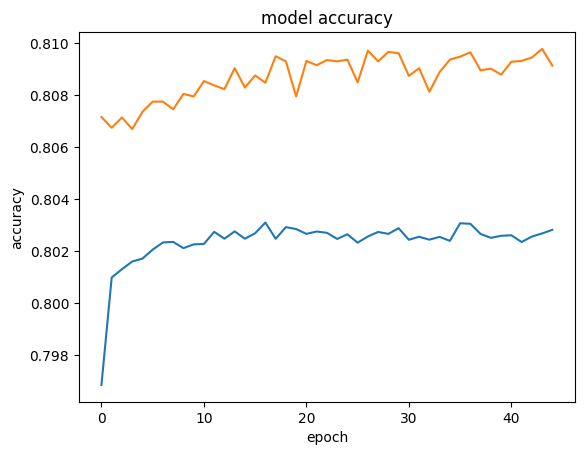

In [ ]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

In [ ]:
predictions = model.predict(val_x)

1032/1032 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [ ]:
val_y

,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,purpose,open_acc,...,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,debt_to_income_ratio,issue_year,issue_month,earliest_cr_year,earliest_cr_month,year_gap_of_credit
0,10000.0,36,11.44,329.48,8.0,5,117000.0,0,12,16.0,...,1,1,0.0,0.0,26.24,2015,1,1990,6,25
1,8000.0,36,11.99,265.68,9.0,1,65000.0,0,2,17.0,...,0,1,3.0,0.0,22.05,2015,1,2004,7,11
2,15600.0,36,10.49,506.97,7.0,5,43057.0,1,1,13.0,...,0,1,0.0,0.0,12.79,2015,1,2007,8,8
3,7200.0,36,6.49,220.65,1.0,5,54000.0,0,1,6.0,...,0,1,0.0,0.0,2.60,2014,11,2006,9,8
4,24375.0,60,17.27,609.33,14.0,1,55000.0,2,1,13.0,...,0,1,1.0,0.0,33.95,2013,4,1999,3,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38714,30000.0,60,9.99,637.27,7.0,4,160000.0,1,2,13.0,...,1,1,6.0,0.0,7.98,2015,10,1998,11,17
38715,20000.0,60,12.35,448.44,8.0,1,54000.0,2,1,18.0,...,0,1,5.0,1.0,26.40,2013,7,1997,3,16
38716,10050.0,36,13.11,339.16,8.0,4,70000.0,0,2,8.0,...,0,1,0.0,0.0,11.42,2013,6,2006,12,7
38717,10225.0,36,14.09,349.92,9.0,5,44000.0,0,2,11.0,...,0,1,0.0,0.0,25.17,2012,9,2004,7,8


In [ ]:
from sklearn.metrics import confusion_matrix, f1_score

cm = confusion_matrix(val_y, predictions)
print("Confusion Matrix:")
print(cm)

f1 = f1_score(val_y, predictions)
print(f"F1 Score: {f1}")
print(accuracy_score(val_y, predictions))

Confusion Matrix:
[[    0  6445]
 [    0 26555]]
F1 Score: 0.8917807069095793
0.8046969696969697


Here we are getting excellent **f1_score** even with **unseen data**